<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Nov/Clase%2010/3_Layer_3_neurons_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline

In [2]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/Machine-Learning-2023/CATS_DOGS/train/*')

In [4]:
num_px=64

In [5]:
#We use firt 500 for test
X=[]
Y=[]
nimages=150
for file in files[:nimages]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    X.append(data)
    img.close()
    if 'dog' in file:
        Y.append(int(1))
    if 'cat' in file:
        Y.append(int(0))
X=np.asarray(X)
Y=np.asarray(Y)

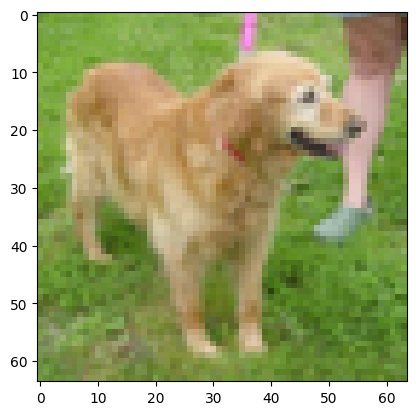

In [6]:
plt.imshow(X[5])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_flatten = X.reshape(X.shape[0], -1).T
scaler=preprocessing.StandardScaler().fit(X_flatten)
X_scaled = scaler.transform(X_flatten)

x_train, x_test, y_train, y_test = train_test_split(X_scaled.T,Y, test_size=0.15, random_state=42)
x_train.shape,x_test.shape


((127, 12288), (23, 12288))

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier  # Importa MLPClassifier de sklearn

regr = MLPClassifier(hidden_layer_sizes=1, activation='logistic', solver='sgd', random_state=1)
regr.fit(x_train, y_train)

tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    Dense(1, activation='sigmoid', name='layer1')
])


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 12289     
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 1s 9ms/step - loss: 1.4776 - binary_accuracy: 0.4567
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6374 - binary_accuracy: 0.7008
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5779 - binary_accuracy: 0.7323
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4636 - binary_accuracy: 0.7795
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4330 - binary_accuracy: 0.7480
Epoch 6/100
4/4 [===========

y = 1, you predicted that it is a "1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy in train set:  1.0
accuracy in test set:  0.6521739130434783


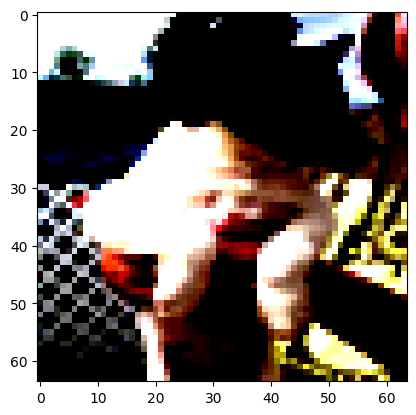

In [10]:
model.summary()
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer='sgd',
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

model.fit(
    x_train,y_train,
    epochs=100,
)

y_pred_test=regr.predict(x_test)
regr.score(x_test, y_test)
index=np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape((num_px, num_px, 3)))
print ("y = " + str(y_test[index]) + ", you predicted that it is a \"" + str(y_pred_test[index]))

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

print("accuracy in train set: ", lr_model.score(x_train,y_train))
print("accuracy in test set: ", lr_model.score(x_test,y_test))

y_pred_test=lr_model.predict(x_test)

In [11]:
# Definir las dimensiones de la red neuronal
input_size = x_train.shape[1]
hidden_layer_1_size = 2
hidden_layer_2_size = 2
output_size = 1

# Configurar la red neuronal
model = Sequential([
    Dense(hidden_layer_1_size, activation='sigmoid', input_shape=(input_size,), name='layer1'),
    Dense(hidden_layer_2_size, activation='sigmoid', name='layer2'),
    Dense(output_size, activation='sigmoid', name='output_layer')
])

# Compilar el modelo
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='sgd',
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# Imprimir un resumen de la arquitectura de la red neuronal
model.summary()

# Entrenar la red neuronal
model.fit(
    x_train, y_train,
    epochs=1,  # Solo una iteración como se solicita
)

# Realizar predicciones
y_pred_test = model.predict(x_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 24578     
                                                                 
 layer2 (Dense)              (None, 2)                 6         
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 24587 (96.04 KB)
Trainable params: 24587 (96.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 128ms/step


Real label:  0
Predicted label:  [0.23985697]


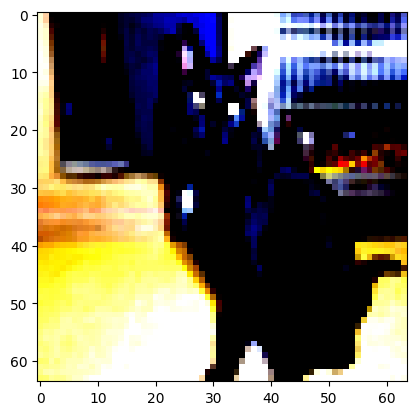

In [12]:
# Imprimir resultados
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape((num_px, num_px, 3)))
print("Real label: ", y_test[index])
print("Predicted label: ", y_pred_test[index])